In [61]:
import os
from cnn import CNN
from transform_color_space import transform_images
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")

# Objetive
The problem to be solved is a real-world issue in which the goal is to detect faults in solar panels through the analysis of thermographs. To achieve this, the images with faults and those without faults have been separated, and a transfer learning process has been conducted using a ResNet50 neural network (the Classes and Functions have tips)

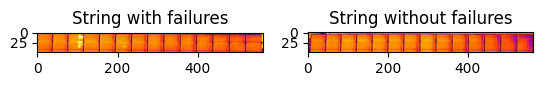

In [65]:
training_dir = 'strings/train'
validation_dir = 'strings/validation'

img_defect = mpimg.imread(training_dir + '/defect/' + os.listdir(training_dir + '/defect/')[1])
img_no_defect = mpimg.imread(training_dir + '/no-defect/' + os.listdir(training_dir + '/no-defect/')[2])

fig, axs = plt.subplots(1,2)
axs[0].imshow(img_defect)
axs[0].set_title('String with failures')
axs[1].imshow(img_no_defect)
axs[1].set_title('String without failures')
plt.show()


#### The failures are the hot spots in the panel that are easy to check using thermography, but solar plants have hundreds of strings and thousands of panels.

# TRAIN

After many iterations and changes in the CNN, the best results were achieved by unfreezing all the neurons in the ResNet50 architecture and applying a three-layer densely connected recurrent neural network (RNN). Regularization techniques were used to reduce overfitting, including the use of dropout.
- The best classification results is using the parameters that we have here:



Reading training and validation data...
Found 158 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


Model summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_12 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 1536)      

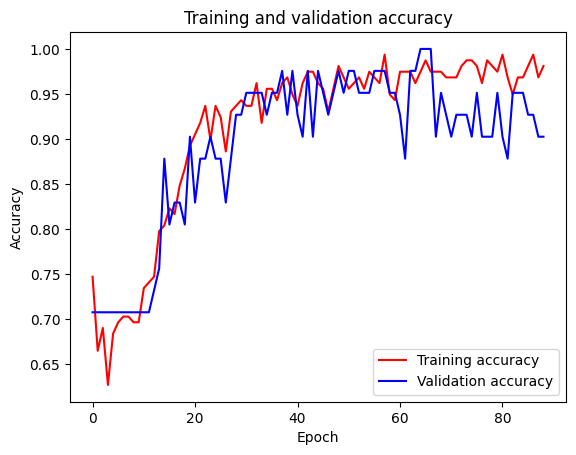

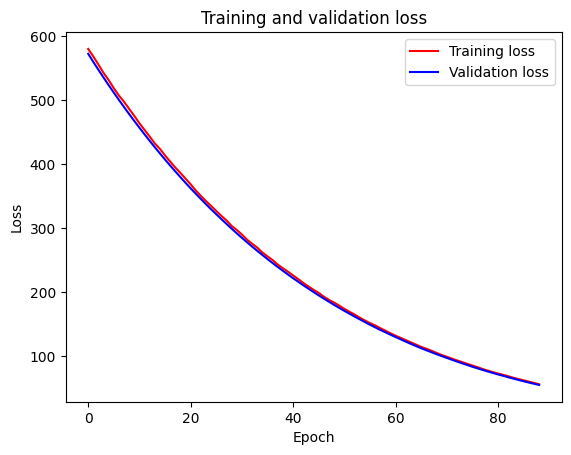

In [66]:


cnn = CNN()
bm = 'ResNet50'
epochs = 89
lr = 1e-4
beta_1 = 0.3
cnn.train(training_dir, validation_dir, base_model=bm, epochs=epochs, learning_rate = lr, 
          training_batch_size=64, validation_batch_size=64, beta_1=beta_1, epsilon=1e-5)
cnn.save(f'{bm}_{epochs}_{lr}_{beta_1}')

# PREDICT

In [67]:
print(f'{bm}_{epochs}_{lr}_{beta_1}')
cnn.load(f'{bm}_{epochs}_{lr}_{beta_1}')
# El mejor modelo hasta ahora es el ResNet50_89_0.0001_0.3


#
cnn.predict("training", training_dir, save= True)
cnn.predict("validation", validation_dir,save = True)

ResNet50_89_0.0001_0.3
Reading test data...
Found 158 images belonging to 2 classes.
158/158 [==============================] - 5s 25ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


CLASSIFICATION RESULTS

Confusion matrix

KNOWN/PREDICTED  defect  no-defect
defect             46.0        0.0
no-defect           7.0      105.0

Accuracy:  0.9556962025316456
training
Reading test data...
Found 41 images belonging to 2 classes.
41/41 [==============================] - 1s 23ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0